-------------------------
#### Evaluation 

- regression task
- using Advertising dataset
-------------------------

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

#### Get the data

In [2]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/Advertising.csv"

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [5]:
df_training.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df_training

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Prepare the data for ML

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['sales']

In [25]:
df_training.shape

(200, 4)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

#### get the ML model libraries

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linreg = LinearRegression()

# train the model (fit the data to the model)

linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
linreg.coef_

array([ 0.04434065,  0.19630366, -0.00501855])

In [35]:
linreg.intercept_

3.0955350181815238

#### Predict

In [36]:
df_training.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
tv    = 200
radio = 40
np    = 90

In [38]:
sales = linreg.intercept_ + linreg.coef_[0] * tv + linreg.coef_[1] * radio + linreg.coef_[2] * np
sales

19.364142140182352

In [39]:
linreg.predict([[tv, radio, np]])

D:\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.36414214])

**Predict for all the X_test samples**

In [41]:
y_pred = linreg.predict(X_test)

In [42]:
y_pred

array([13.67578534, 10.82366579,  6.60548462, 11.99682948, 14.38995014,
       15.51704047, 10.50801664,  7.49734872,  6.18254539, 10.85653708,
       19.02857301, 23.27573912,  9.15727964, 19.93624693, 20.85790165,
        7.82500001, 12.21461795, 17.32115719, 15.65680133, 13.89721943,
       17.30668667, 14.71373441, 20.83369459,  9.96569998,  9.63466027,
       11.64819619,  7.5493453 , 12.35879348,  7.97614736, 20.3713136 ,
       16.40455166,  9.03618616, 14.34808377,  7.87758219,  9.86530114,
        5.44641544,  8.79691714, 21.78661617, 12.71443024, 13.73527707])

In [45]:
y_test.values

array([13.3,  6.6,  8.8, 11.7, 15.5, 15.6, 10.5,  8.4,  6.7,  1.6, 19.4,
       25.4,  5.3, 20.2, 22.4,  7.6, 13.2, 17. , 16. , 14.1, 17.4, 14.7,
       21.7, 11.2, 11. , 12.9,  9.6, 10.6,  9.3, 22.1, 15.5,  8.5, 12.3,
        9.7, 11.6,  7.6,  5.7, 23.2, 12.5, 11.9])

#### calculate the regression metrics

In [46]:
from sklearn import metrics

**Mean Absolute error**

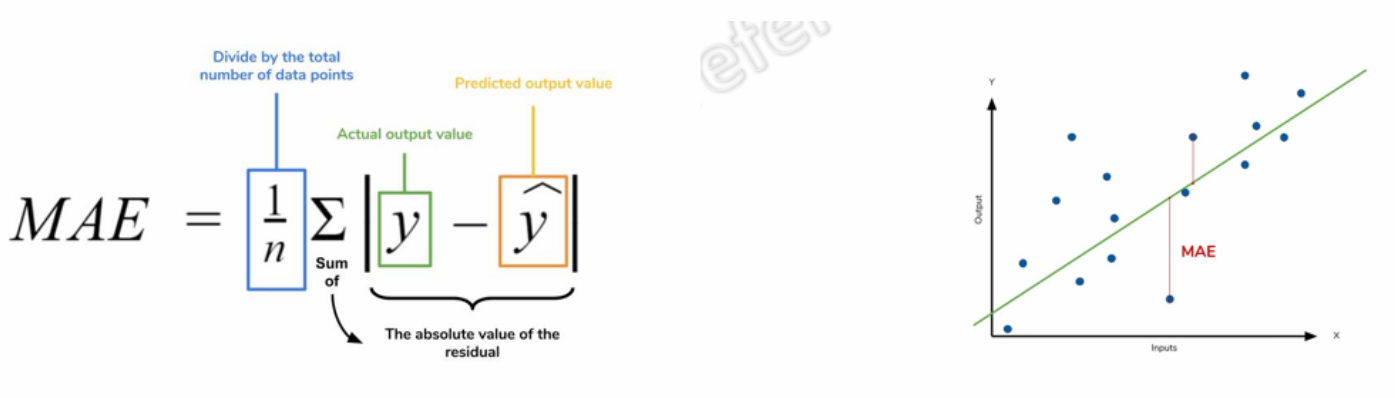

In [47]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))

Mean Abs Error   MAE    :  1.4162779357075759


In [50]:
df_training.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


##### 2. Mean square error (MSE)

- The mean square error (MSE) is just like the MAE but squares the difference before summing them all instead of using the absolute value. 

- Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. 

- The effect of the square term in the MSE equation is most apparent with the __presence of outliers__ in our data. 

- Each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. 

- Outliers in our data will contribute to much higher total error in the MSE than they would the MAE. 

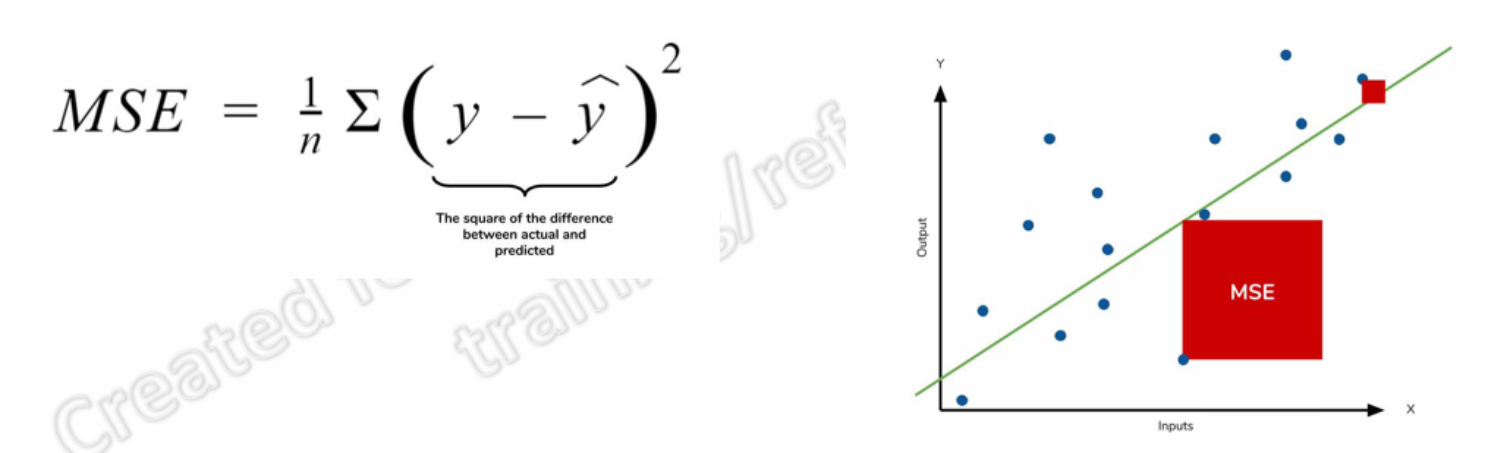

In [51]:
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

Mean Sq  Error MSE      :  4.579376129049797


In [52]:
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

r2 value                :  0.8430104573290513
